In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

# Lab | Customer Analysis Final Round


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

## 01 - Problem (case study)

- Data Description.

- Goal.

## 02 - Getting Data

Read the .csv file.

In [242]:
data = pd.read_csv('/Users/ziga/Classroom-Materials-main/Homework/lab-customer-analysis-round-2-main/files_for_lab/csv_files/marketing_customer_analysis.csv')
data

Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentStatus Gender  Income  \
0         Basic   College           2/18/11         Employed      M   48029   
1         Basic   College           1/18/11       Unemployed      F       0   
2         Basic  Bachelor           2/10/11         Employed      M   22139   
3      Extended   College           1/11/11         Employed      M   49078   
4       Premium  Bachelor           1/17/11    Medical Leave      F   23675   
...         ...       ...               ...              ...    ...     ...   
10905   Premium  Bachelor           1/19/11       Unemployed      F       0   
10906     Basic   College            1/6/11         Employed      F   61146   
10907  Extended  Bachelor            2/6/11         Employed      F   39837   
10908   Premium   College           2/13/11         Employed      F   64195   
10909     Basic  Bachelor            1/8/11       Unemployed      M       0   

      Location Code Marital Status  Monthly Premium Auto  \
0          Suburban        Married                    61   
1          Suburban         Single                    64   
2          Suburban         Single                   100   
3          Suburban         Single                    97   
4          Suburban        Married                   117   
...             ...            ...                   ...   
10905      Suburban        Married                   253   
10906         Urban        Married                    65   
10907         Rural        Married                   201   
10908         Urban       Divorced                   158   
10909      Suburban         Single                   101   

       Months Since Last Claim  Months Since Policy Inception  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          NaN                             31   
...                        ...                            ...   
10905                      NaN                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       Number of Open Complaints  Number of Policies     Policy Type  \
0                            0.0                   9  Corporate Auto   
1                            0.0                   1   Personal Auto   
2                            0.0                   2   Personal Auto   
3                            0.0                   2  Corporate Auto   
4                            NaN                   7   Personal Auto   
...                          ...                 ...             ...   
10905                        NaN                   7   Personal Auto   
10906                        0.0                   6   Personal Aut

## 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [243]:
data.head()

Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0           0  DK49336     Arizona              4809.216960       No   
1           1  KX64629  California              2228.525238       No   
2           2  LZ68649  Washington             14947.917300       No   
3           3  XL78013      Oregon             22332.439460      Yes   
4           4  QA50777      Oregon              9025.067525       No   

   Coverage Education Effective To Date EmploymentStatus Gender  Income  \
0     Basic   College           2/18/11         Employed      M   48029   
1     Basic   College           1/18/11       Unemployed      F       0   
2     Basic  Bachelor           2/10/11         Employed      M   22139   
3  Extended   College           1/11/11         Employed      M   49078   
4   Premium  Bachelor           1/17/11    Medical Leave      F   23675   

  Location Code Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0      Suburban        Married                    61                      7.0   
1      Suburban         Single                    64                      3.0   
2      Suburban         Single                   100                     34.0   
3      Suburban         Single                    97                     10.0   
4      Suburban        Married                   117                      NaN   

   Months Since Policy Inception  Number of Open Complaints  \
0                             52                        0.0   
1                             26                        0.0   
2                             31                        0.0   
3                              3                        0.0   
4                             31                        NaN   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   9  Corporate Auto  Corporate L3           Offer3   
1                   1   Personal Auto   Personal L3           Offer4   
2                   2   Personal Auto   Personal L3           Offer3   
3                   2  Corporate Auto  Corporate L3           Offer2   
4                   7   Personal Auto   Personal L2           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size Vehicle Type  
0         Agent          292.800000  Four-Door Car      Medsize          NaN  
1   Call Center          744.924331  Four-Door Car      Medsize          NaN  
2   Call Center          480.000000            SUV      Medsize            A  
3        Branch          484.013411  Four-Door Car      Medsize            A  
4        Branch          707.925645  Four-Door Car      Medsize          NaN

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [245]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [246]:
data.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [247]:
data = data.drop_duplicates()

In [248]:
data.isnull().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [249]:
num = data.select_dtypes(include=np.number)
num

unnamed:_0  customer_lifetime_value  income  monthly_premium_auto  \
0               0              4809.216960   48029                    61   
1               1              2228.525238       0                    64   
2               2             14947.917300   22139                   100   
3               3             22332.439460   49078                    97   
4               4              9025.067525   23675                   117   
...           ...                      ...     ...                   ...   
10905       10905             15563.369440       0                   253   
10906       10906              5259.444853   61146                    65   
10907       10907             23893.304100   39837                   201   
10908       10908             11971.977650   64195                   158   
10909       10909              6857.519928       0                   101   

       months_since_last_claim  months_since_policy_inception  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          NaN                             31   
...                        ...                            ...   
10905                      NaN                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       number_of_open_complaints  number_of_policies  total_claim_amount  
0                            0.0                   9          292.800000  
1                            0.0                   1          744.924331  
2                            0.0                   2          480.000000  
3                            0.0                   2          484.013411  
4                            NaN                   7          707.925645  
...                          ...                 ...                 ...  
10905                        NaN                   7         1214.400000  
10906                        0.0                   6          273.018929  
10907                        0.0                   2          381.306996  
10908                        4.0                   6          618.288849  
10909                        0.0                   3         1021.719397  

[10910 rows x 9 columns]

In [250]:
cat = data.select_dtypes('object')
cat

customer       state response  coverage education effective_to_date  \
0      DK49336     Arizona       No     Basic   College           2/18/11   
1      KX64629  California       No     Basic   College           1/18/11   
2      LZ68649  Washington       No     Basic  Bachelor           2/10/11   
3      XL78013      Oregon      Yes  Extended   College           1/11/11   
4      QA50777      Oregon       No   Premium  Bachelor           1/17/11   
...        ...         ...      ...       ...       ...               ...   
10905  FE99816      Nevada       No   Premium  Bachelor           1/19/11   
10906  KX53892      Oregon       No     Basic   College            1/6/11   
10907  TL39050     Arizona       No  Extended  Bachelor            2/6/11   
10908  WA60547  California       No   Premium   College           2/13/11   
10909  IV32877         NaN      NaN     Basic  Bachelor            1/8/11   

      employmentstatus gender location_code marital_status     policy_type  \
0             Employed      M      Suburban        Married  Corporate Auto   
1           Unemployed      F      Suburban         Single   Personal Auto   
2             Employed      M      Suburban         Single   Personal Auto   
3             Employed      M      Suburban         Single  Corporate Auto   
4        Medical Leave      F      Suburban        Married   Personal Auto   
...                ...    ...           ...            ...             ...   
10905       Unemployed      F      Suburban        Married   Personal Auto   
10906         Employed      F         Urban        Married   Personal Auto   
10907         Employed      F         Rural        Married  Corporate Auto   
10908         Employed      F         Urban       Divorced   Personal Auto   
10909       Unemployed      M      Suburban         Single   Personal Auto   

             policy renew_offer_type sales_channel  vehicle_class  \
0      Corporate L3           Offer3         Agent  Four-Door Car   
1       Personal L3           Offer4   Call Center  Four-Door Car   
2       Personal L3           Offer3   Call Center            SUV   
3      Corporate L3           Offer2        Branch  Four-Door Car   
4       Personal L2           Offer1        Branch  Four-Door Car   
...             ...              ...           ...            ...   
10905   Personal L1           Offer3           Web     Luxury Car   
10906   Personal L3           Offer2        Branch  Four-Door Car   
10907  Corporate L3           Offer1           Web     Luxury SUV   
10908   Personal L1           Offer1        Branch            SUV   
10909   Personal L1           Offer4           Web            SUV   

      vehicle_size vehicle_type  
0          Medsize          NaN  
1          Medsize          NaN  
2          Medsize            A  
3          Medsize            A  
4          Medsize          NaN  
...            ...          ...  
10905      Medsize            A  
10906      Medsize            A  
10907      Medsize          NaN  
10908      Medsize            A  
10909      Medsize          NaN  

[10910 rows x 17 columns]

## 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

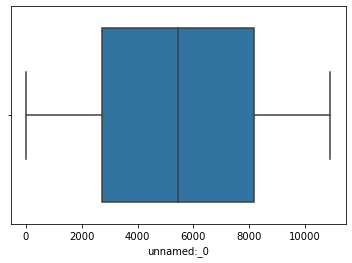

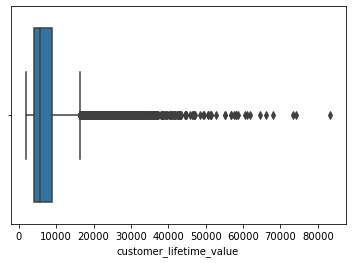

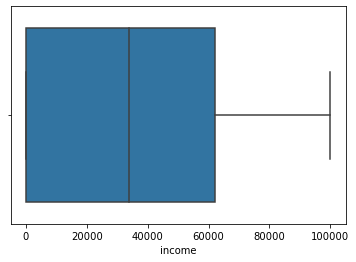

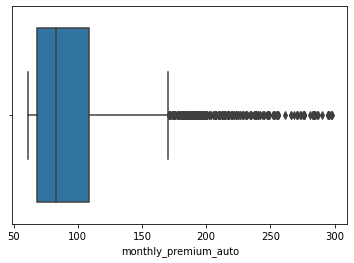

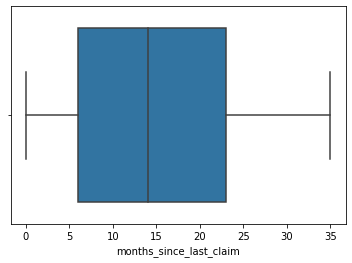

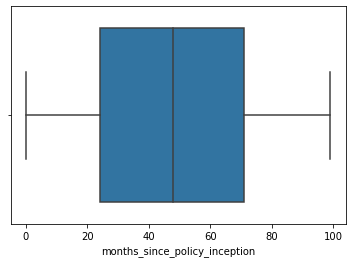

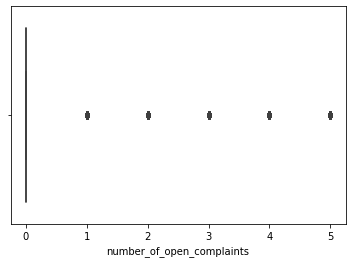

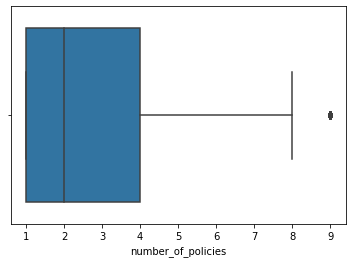

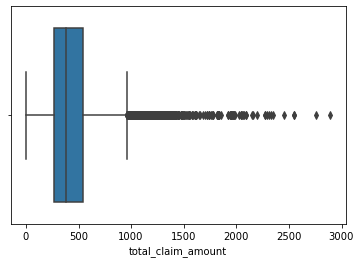

In [251]:
for column in data.select_dtypes(np.number).columns: 
    sns.boxplot(data[column])
    plt.show()

In [252]:
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25) 
np.percentile(data['customer_lifetime_value'],25),np.percentile(data['customer_lifetime_value'],75)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr
upper_limit, lower_limit

data = data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]


In [253]:
iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25) 
np.percentile(data['monthly_premium_auto'],25),np.percentile(data['monthly_premium_auto'],75)
upper_limit = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr
upper_limit, lower_limit

data = data[(data['monthly_premium_auto']>lower_limit) & (data['monthly_premium_auto']<upper_limit)]


In [254]:
iqr = np.percentile(data['total_claim_amount'],75) - np.percentile(data['total_claim_amount'],25) 
np.percentile(data['total_claim_amount'],25),np.percentile(data['total_claim_amount'],75)
upper_limit = np.percentile(data['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(data['total_claim_amount'],25) - 1.5*iqr
upper_limit, lower_limit

data = data[(data['total_claim_amount']>lower_limit) & (data['total_claim_amount']<upper_limit)]


In [ ]:
# Im sure the above can be looped somehow but yet to figure how 

In [255]:
data.corr()

unnamed:_0  customer_lifetime_value    income  \
unnamed:_0                       1.000000                 0.019567  0.010473   
customer_lifetime_value          0.019567                 1.000000  0.064968   
income                           0.010473                 0.064968  1.000000   
monthly_premium_auto             0.006285                 0.423079  0.025226   
months_since_last_claim          0.003951                -0.021910 -0.025803   
months_since_policy_inception    0.008853                -0.010890 -0.001946   
number_of_open_complaints        0.007821                -0.024016  0.002505   
number_of_policies               0.001180                 0.224961 -0.005328   
total_claim_amount              -0.005588                 0.149769 -0.380591   

                               monthly_premium_auto  months_since_last_claim  \
unnamed:_0                                 0.006285                 0.003951   
customer_lifetime_value                    0.423079                -0.021910   
income                                     0.025226                -0.025803   
monthly_premium_auto                       1.000000                -0.013829   
months_since_last_claim                   -0.013829                 1.000000   
months_since_policy_inception              0.003010                -0.044435   
number_of_open_complaints                 -0.022442                 0.011736   
number_of_policies                        -0.013722                 0.004170   
total_claim_amount                         0.427764                -0.019659   

                               months_since_policy_inception  \
unnamed:_0                                          0.008853   
customer_lifetime_value                            -0.010890   
income                                             -0.001946   
monthly_premium_auto                                0.003010   
months_since_last_claim                            -0.044435   
months_since_policy_inception                       1.000000   
number_of_open_complaints                           0.001664   
number_of_policies                                 -0.012339   
total_claim_amount                                 -0.024018   

                               number_of_open_complaints  number_of_policies  \
unnamed:_0                                      0.007821            0.001180   
customer_lifetime_value                        -0.024016            0.224961   
income                                          0.002505           -0.005328   
monthly_premium_auto                           -0.022442           -0.013722   
months_since_last_claim                         0.011736            0.004170   
months_since_policy_inception                   0.001664           -0.012339   
number_of_open_complaints                       1.000000            0.009796   
number_of_policies                              0.009796            1.000000   
total_claim_amount                             -0.017503           -0.014359   

                               total_claim_amount  
unnamed:_0                              -0.005588  
customer_lifetime_value                  0.149769  
income                                  -0.380591  
monthly_premium_auto                     0.427764  
months_since_last_claim                 -0.019659  
months_since_policy_inception           -0.024018  
number_of_open_complaints               -0.017503  
number_of_policies                      -0.014359  
total_claim_amount                       1.000000

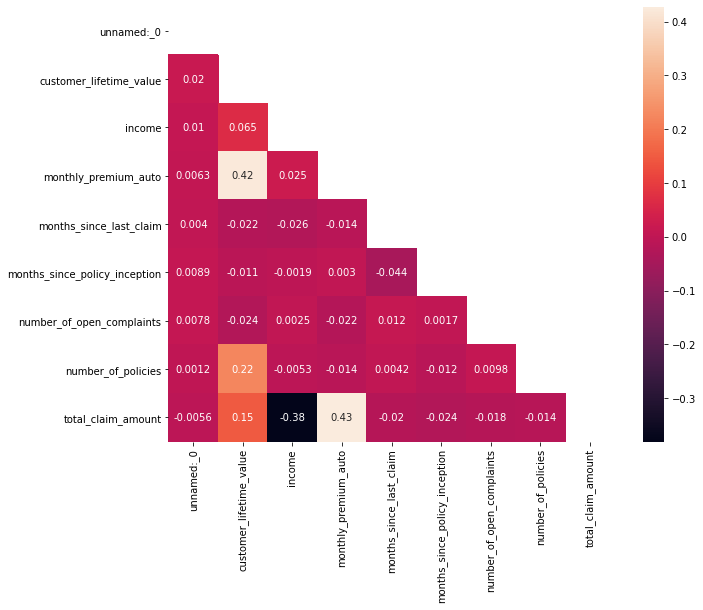

In [256]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [257]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

In [258]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [259]:
def boxcox_transform(df):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [260]:
data, _ci = boxcox_transform(data)
data

unnamed:_0 customer       state  customer_lifetime_value response  \
0       613.952872  DK49336     Arizona                 6.957149       No   
1         0.000000  KX64629  California                 6.436776       No   
2         0.894130  LZ68649  Washington                 7.689935       No   
4         2.352621  QA50777      Oregon                 7.368848       No   
5         2.995671  HO81102         NaN                 6.948245      NaN   
...            ...      ...         ...                      ...      ...   
10901  1001.745936  RY92254  Washington                 6.919999       No   
10902  1001.810897  PP30874  California                 6.759559       No   
10903  1001.875857  SU71163     Arizona                 6.586298       No   
10906  1002.070725  KX53892      Oregon                 7.016445       No   
10908  1002.200628  WA60547  California                 7.549624       No   

       coverage             education effective_to_date employmentstatus  \
0         Basic               College           2/18/11         Employed   
1         Basic               College           1/18/11       Unemployed   
2         Basic              Bachelor           2/10/11         Employed   
4       Premium              Bachelor           1/17/11    Medical Leave   
5         Basic  High School or Below           2/14/11         Employed   
...         ...                   ...               ...              ...   
10901   Premium              Bachelor           1/13/11         Employed   
10902  Extended  High School or Below           1/24/11         Employed   
10903     Basic               College            1/7/11         Employed   
10906     Basic               College            1/6/11         Employed   
10908   Premium               College           2/13/11         Employed   

      gender       income location_code marital_status  monthly_premium_auto  \
0          M  1177.441080      Suburban        Married              0.716202   
1          F  1215.752563      Suburban         Single              0.716354   
2          M   733.339590      Suburban         Single              0.717373   
4          F   764.052228      Suburban        Married              0.717605   
5          M  1214.819418      Suburban       Divorced              0.716202   
...      ...          ...           ...            ...                   ...   
10901      M   945.258807      Suburban        Married              0.717594   
10902      F   852.220673      Suburban        Married              0.717207   
10903      M  1346.967408      Suburban        Married              0.716757   
10906      F  1364.645564         Urban        Married              0.716401   
10908      F  1405.829011         Urban       Divorced              0.717930   

       months_since_last_claim  months_since_policy_inception  \
0                     3.690539                      22.170339   
1                     1.555388                      12.962097   
2                    12.163123                      14.885930   
4                     6.985396                      14.885930   
5                     0.859556                      28.637073   
...                        ...                            ...   
10901                 5.359651                       8.293754   
10902                 4.969074                      14.508707   
10903                11.162450                      31.239580   
10906                 3.690539                      27.151852   
10908                 6.985396                      13.354756   

       number_of_open_complaints  number_of_policies     policy_type  \
0                       0.669199            1.522845  Corporate Auto   
1                       0.669199            0.000000   Personal Auto   
2                       0.669199            0.614061   Personal Auto   
4                       0.669199            1.402824   Personal Auto   
5                       0.669199            1.402824   Personal Auto

In [261]:
data = pd.get_dummies(data, drop_first=True)
data

unnamed:_0  customer_lifetime_value       income  \
0       613.952872                 6.957149  1177.441080   
1         0.000000                 6.436776  1215.752563   
2         0.894130                 7.689935   733.339590   
4         2.352621                 7.368848   764.052228   
5         2.995671                 6.948245  1214.819418   
...            ...                      ...          ...   
10901  1001.745936                 6.919999   945.258807   
10902  1001.810897                 6.759559   852.220673   
10903  1001.875857                 6.586298  1346.967408   
10906  1002.070725                 7.016445  1364.645564   
10908  1002.200628                 7.549624  1405.829011   

       monthly_premium_auto  months_since_last_claim  \
0                  0.716202                 3.690539   
1                  0.716354                 1.555388   
2                  0.717373                12.163123   
4                  0.717605                 6.985396   
5                  0.716202                 0.859556   
...                     ...                      ...   
10901              0.717594                 5.359651   
10902              0.717207                 4.969074   
10903              0.716757                11.162450   
10906              0.716401                 3.690539   
10908              0.717930                 6.985396   

       months_since_policy_inception  number_of_open_complaints  \
0                          22.170339                   0.669199   
1                          12.962097                   0.669199   
2                          14.885930                   0.669199   
4                          14.885930                   0.669199   
5                          28.637073                   0.669199   
...                              ...                        ...   
10901                       8.293754                   0.669199   
10902                      14.508707                   0.732112   
10903                      31.239580                   1.548047   
10906                      27.151852                   0.669199   
10908                      13.354756                   1.548047   

       number_of_policies  total_claim_amount  customer_AA30683  \
0                1.522845           93.267126                 0   
1                0.000000          189.329635                 0   
2                0.614061          135.758220                 0   
4                1.402824          182.177232                 0   
5                1.402824           93.267126                 0   
...                   ...                 ...               ...   
10901            0.000000          200.112586                 0   
10902            0.000000          171.820734                 0   
10903            0.000000          108.028172                 0   
10906            1.323697           88.428829                 0   
10908            1.323697          164.446736                 0   

       customer_AA35519  customer_AA56476  customer_AA69265  customer_AA71604  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
4                     0                 0                 0                 0   
5                     0                 0                 0                 0   
...                 ...               ...               ...               ...   
10901                 0                 0                 0                 0   
10902                 0                 0                 0                 0   
10903                 0                 0                 0                 0   
10906                 0                 0                 0                 0   
10908                 0                 0                 0                 0   

       customer_AB13432  custom

In [262]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## 05 - Modeling

Apply model.

In [263]:
model = LinearRegression()
model.fit(X_train, y_train)
#receiving an error here - not sure why 

ValueError: could not convert string to float: 'IX46908'

In [ ]:
predictions = model.predict(X_test)

## 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [ ]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(mse)

In [ ]:
rmse = math.sqrt(mse)
print(rmse)

In [ ]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

## 07 - Reporting

Present results.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)


In [ ]:
model.coef_

In [ ]:
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['total_claim_amount'])

In [ ]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

In [ ]:
results.describe()

In [ ]:
#work in progress.